In [1]:
from xmlrpc.client import ServerProxy #загрузка всех библиотек, подключение pymol
from IPython.display import Image

import os, sys, time, imageio
from pymol import cmd,stored

import numpy as np

In [3]:
cmd = ServerProxy(uri="http://localhost:9123/RPC2")
#на этом шаге нужно вбить в командную строку pymol -R

#### Загрузим структуру, приблизим, зададим сцену 

In [4]:
cmd.do('''
bg_color white
fetch 1cll, async=0
as lines, n. C+O+N+CA
zoom i. 4+5
mset 1 x1000
mview store''')

In [5]:
cmd.set('ray_trace_mode', 1)
cmd.png('/tmp/pymol_first_pic.png')

##### Вот, что получилось  

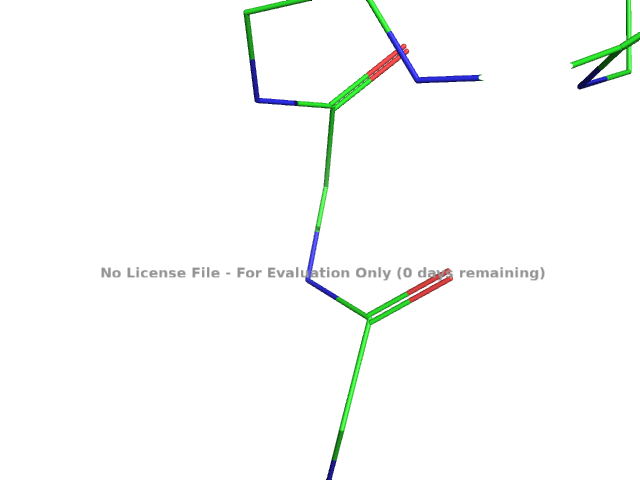

In [125]:
Image('/tmp/pymol_first_pic.png', width = 700)

#### Покрасим структуру по ак остаткам сгенерированной палитрой цветов, используем cartoon для отображения

In [16]:
stored = [] 
cmd.iterate('1cll and n. CA','stored.append(resi)')

length = len(stored)
colors = np.linspace(1,0.5, length)
for k,i in enumerate(stored):
    cmd.set_color('col%d' %k, [colors[k],0.5,0.75])
    cmd.set('cartoon_color','col%d' % k ,'resi %d' % int(i))
cmd.show_as('cartoon','all')

[]

##### Отобразим наш остаток

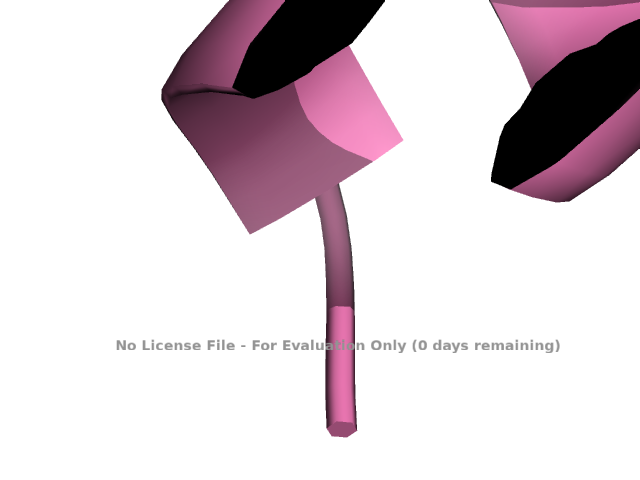

In [127]:
cmd.png('/tmp/first_view_colored.png')
Image(filename='/tmp/first_view_colored.png')

##### Отобразим покрашенную структуру целиком 

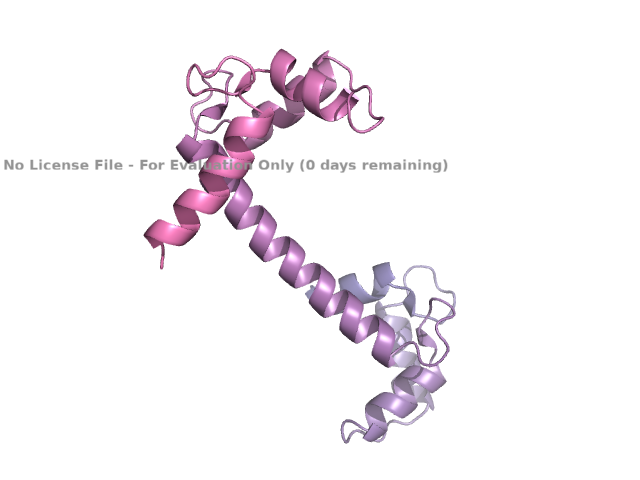

In [129]:
cmd.zoom("1cll")
cmd.png('/tmp/first_view_colored_all.png')
Image(filename='/tmp/first_view_colored_all.png')

#### Сделаем фильм с итерацией вдоль остатков по структуре 

In [7]:
for i in range(length):
    cmd.frame((10*i)+1)
    cmd.zoom( 'n. CA and i. %d+%d' % (i,i+7))
    cmd.mview('store') 

In [142]:
!mkdir pymolmovie

In [22]:
cmd.mstop()
cmd.mpng('pymolmovie/') 

##### Сделаем гифку

In [18]:
with imageio.get_writer('/tmp/movie.gif.png', format='gif', mode='I') as writer:
    for img in os.listdir('pymolmovie/')[::4]:
        filename = 'pymolmovie/' + img
        image = imageio.imread(filename)
        writer.append_data(image)

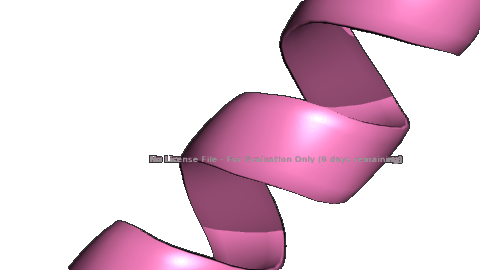

In [23]:
Image(filename='/tmp/movie.gif.png')